# Assignment 6: Text Analytics: String Distances

**Mukund Dhar,
UCF ID: 5499369**

In [4]:
# loading the necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import jellyfish

In [5]:
input_name = "Mukund" # initializing my name

In [6]:
babynames = pd.read_csv("babyNamesUSYOB-full.csv") # loading the babynames dataset

In [7]:
babynames.head()

,YearOfBirth,Name,Sex,Number
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [8]:
babynames.shape

(1858689, 4)

In [9]:
# Preprocessing the babynames data
names = babynames['Name'].apply(lambda x: re.sub('[^a-zA-Z]', '', x.lower())).drop_duplicates()

In [10]:
# defining the distance metrics

def hamming_distance(a, b):
    """Computes the Hamming distance between two strings."""
    if len(a) != len(b):
        raise ValueError("Strings must be of equal length.")
    return sum(1 for x, y in zip(a, b) if x != y)


def longest_common_substring_distance(a, b):
    """Computes the distance between two strings as the length of their longest common substring."""
    lengths = np.zeros((len(a) + 1, len(b) + 1))
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i + 1][j + 1] = lengths[i][j] + 1
    return len(a) + len(b) - 2 * lengths.max()


def levenshtein_distance(a, b):
    """Computes the Levenshtein distance between two strings."""
    return jellyfish.levenshtein_distance(a, b)


def damerau_levenshtein_distance(a, b):
    """Computes the full Damerau-Levenshtein distance between two strings."""
    return jellyfish.damerau_levenshtein_distance(a, b)


def restricted_damerau_levenshtein_distance(s1, s2):
    # Compute the standard Damerau-Levenshtein distance
    d = jellyfish.damerau_levenshtein_distance(s1, s2)
    
    # Count the number of adjacent transpositions
    transpositions = 0
    for i in range(min(len(s1), len(s2)) - 1):
        if s1[i] != s2[i] and s1[i+1] == s2[i] and s1[i] == s2[i+1]:
            transpositions += 1
    
    # Subtract the number of adjacent transpositions
    d_restricted = d - transpositions
    
    return d_restricted


def qgram_distance(a, b, q):
    """Computes the q-gram distance between two strings."""
    a_qgrams = set(a[i:i + q] for i in range(len(a) - q + 1))
    b_qgrams = set(b[i:i + q] for i in range(len(b) - q + 1))
    return 1 - len(a_qgrams & b_qgrams) / len(a_qgrams | b_qgrams)


def jaro_distance(a, b):
    """Computes the Jaro distance between two strings."""
    return jellyfish.jaro_distance(a, b)


def jaro_winkler_distance(a, b, weight=0.1):
    """Computes the Jaro-Winkler distance between two strings."""
    return jellyfish.jaro_winkler(a, b)


def jaccard_distance(a, b, q):
    """Computes the Jaccard distance between two strings based on their q-gram profiles."""
    a_qgrams = set(a[i:i + q] for i in range(len(a) - q + 1))
    b_qgrams = set(b[i:i + q] for i in range(len(b) - q + 1))
    return 1 - len(a_qgrams & b_qgrams) / len(a_qgrams | b_qgrams)


def cosine_distance(a, b, q):
    """Computes the cosine distance between two strings based on their q-gram profiles."""
    a_qgrams = set(a[i:i + q] for i in range(len(a) - q + 1))
    b_qgrams = set(b[i:i + q] for i in range(len(b) - q + 1))
    intersection = len(a_qgrams & b_qgrams)
    norm_a = np.sqrt(len(a_qgrams))
    norm_b = np.sqrt(len(b_qgrams))
    return 1 - intersection / (norm_a * norm_b)


def soundex_distance(a, b):
    """Computes the distance between two strings based on their Soundex encoding."""
    soundex_a = jellyfish.soundex(a)
    soundex_b = jellyfish.soundex(b)
    return 0 if soundex_a == soundex_b else 1

In [11]:
def name_distance(name, distance_metric):
    """Computes the distance between the input name and another name based on a given distance metric."""
    return distance_metric(input_name, name)

In [12]:
# Computing the distance between the input name and each name in the dataset based on each distance metric
# babynames['hamming_distance'] = names.apply(lambda x: name_distance(x, hamming_distance))
babynames['longest_common_substring_distance'] = names.apply(lambda x: name_distance(x, longest_common_substring_distance))
babynames['levenshtein_distance'] = names.apply(lambda x: name_distance(x, levenshtein_distance))
babynames['damerau_levenshtein_distance'] = names.apply(lambda x: name_distance(x, damerau_levenshtein_distance))
babynames['restricted_damerau_levenshtein_distance'] = names.apply(lambda x: name_distance(x, restricted_damerau_levenshtein_distance))
babynames['qgram_distance'] = names.apply(lambda x: name_distance(x, lambda a, b: qgram_distance(a, b, 2)))
babynames['jaro_distance'] = names.apply(lambda x: name_distance(x, jaro_distance))
babynames['jaro_winkler_distance'] = names.apply(lambda x: name_distance(x, jaro_winkler_distance))
babynames['jaccard_distance'] = names.apply(lambda x: name_distance(x, lambda a, b: jaccard_distance(a, b, 2)))
babynames['cosine_distance'] = names.apply(lambda x: name_distance(x, lambda a, b: cosine_distance(a, b, 2)))
babynames['soundex_distance'] = names.apply(lambda x: name_distance(x, soundex_distance))


In [14]:
# Sorting the dataframes by each distance metric and selecting the top ten names
# top10_hamming = babynames.sort_values('hamming_distance').head(10)['Name']
top10_lcs = babynames.sort_values('longest_common_substring_distance').head(10)['Name']
top10_levenshtein = babynames.sort_values('levenshtein_distance').head(10)['Name']
top10_dl = babynames.sort_values('damerau_levenshtein_distance').head(10)['Name']
top10_restricted_dl = babynames.sort_values('restricted_damerau_levenshtein_distance').head(10)['Name']
top10_qgram = babynames.sort_values('qgram_distance').head(10)['Name']
top10_jaro = babynames.sort_values('jaro_distance', ascending=False).head(10)['Name']
top10_jaro_winkler = babynames.sort_values('jaro_winkler_distance', ascending=False).head(10)['Name']
top10_jaccard = babynames.sort_values('jaccard_distance').head(10)['Name']
top10_cosine = babynames.sort_values('cosine_distance').head(10)['Name']
top10_soundex = babynames.sort_values('soundex_distance').head(10)['Name']

# Printing the top ten names for each distance metric
# print('Top 10 names based on Hamming distance:')
# print(top10_hamming)
# print('')

print('Top 10 names based on longest common substring distance:')
print(top10_lcs)
print('')

print('Top 10 names based on Levenshtein distance:')
print(top10_levenshtein)
print('')

print('Top 10 names based on full Damerau-Levenshtein distance:')
print(top10_dl)
print('')

print('Top 10 names based on restricted Damerau-Levenshtein distance:')
print(top10_restricted_dl)
print('')

print('Top 10 names based on q-gram distance:')
print(top10_qgram)
print('')

print('Top 10 names based on Jaro distance:')
print(top10_jaro)
print('')

print('Top 10 names based on Jaro-Winkler distance:')
print(top10_jaro_winkler)
print('')

print('Top 10 names based on Jaccard distance:')
print(top10_jaccard)
print('')

print('Top 10 names based on cosine distance:')
print(top10_cosine)
print('')

print('Top 10 names based on Soundex distance:')
print(top10_soundex)


Top 10 names based on longest common substring distance:
1272422     Mukund
1858055    Mukunda
1587092       Kuno
1303322       Kunj
1001470         Ku
835026          Un
1405960       Rund
805735       Lukus
62489          Sun
734248       Funda
Name: Name, dtype: object

Top 10 names based on Levenshtein distance:
1272422     Mukund
1858055    Mukunda
725904       Uland
1303322       Kunj
1689414     Rylund
625751       Duuna
1128        Edmund
1452989     Dukens
720816      Sukina
179470        Uuno
Name: Name, dtype: object

Top 10 names based on full Damerau-Levenshtein distance:
1272422     Mukund
1858055    Mukunda
179470        Uuno
1318435     Yukino
720816      Sukina
1303322       Kunj
547798      Osmund
1505530     Yukina
118981      Eugune
1711226      Yuuna
Name: Name, dtype: object

Top 10 names based on restricted Damerau-Levenshtein distance:
1272422     Mukund
185676       Ikuko
1858055    Mukunda
1380291      Yuuka
922049      Nikunj
1484079      Mukul
625751       D

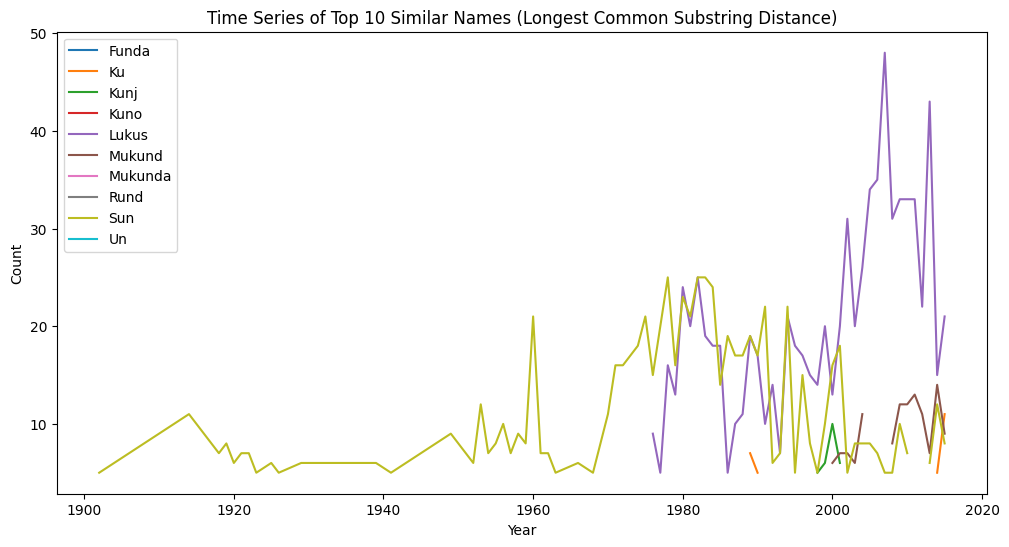

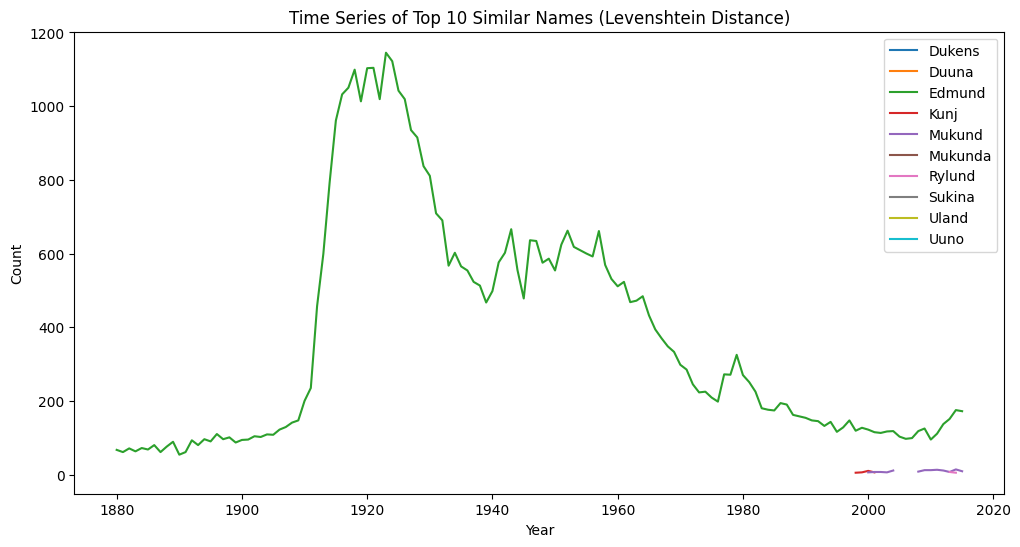

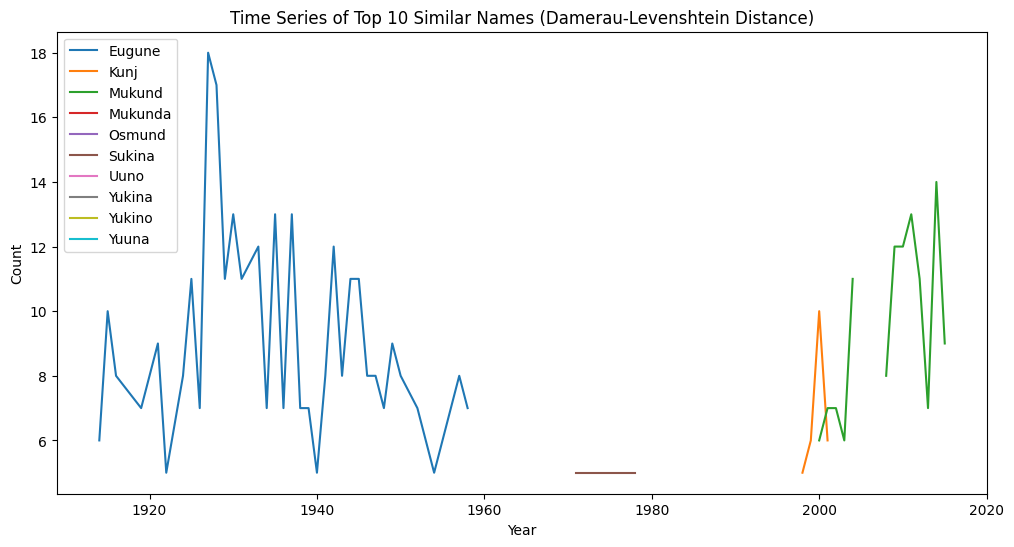

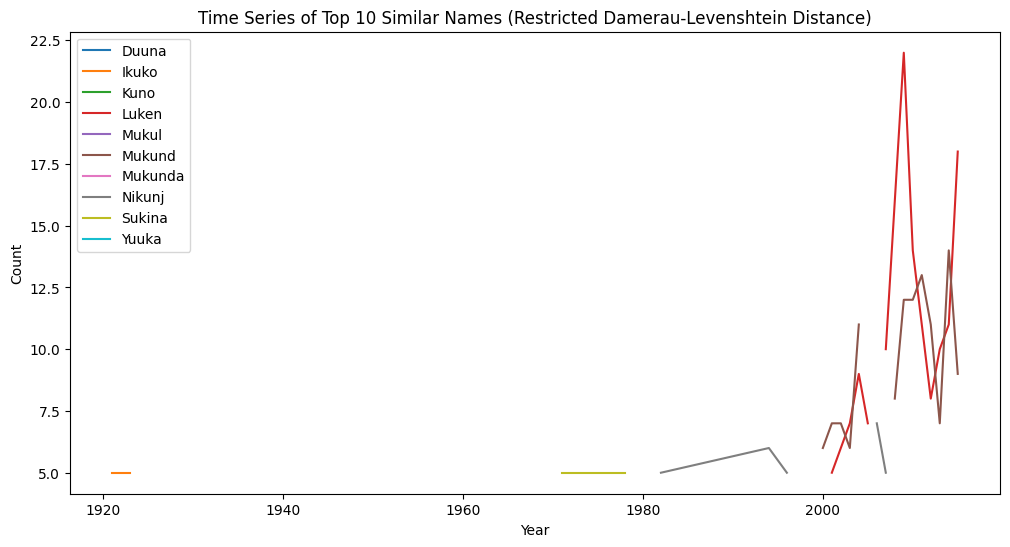

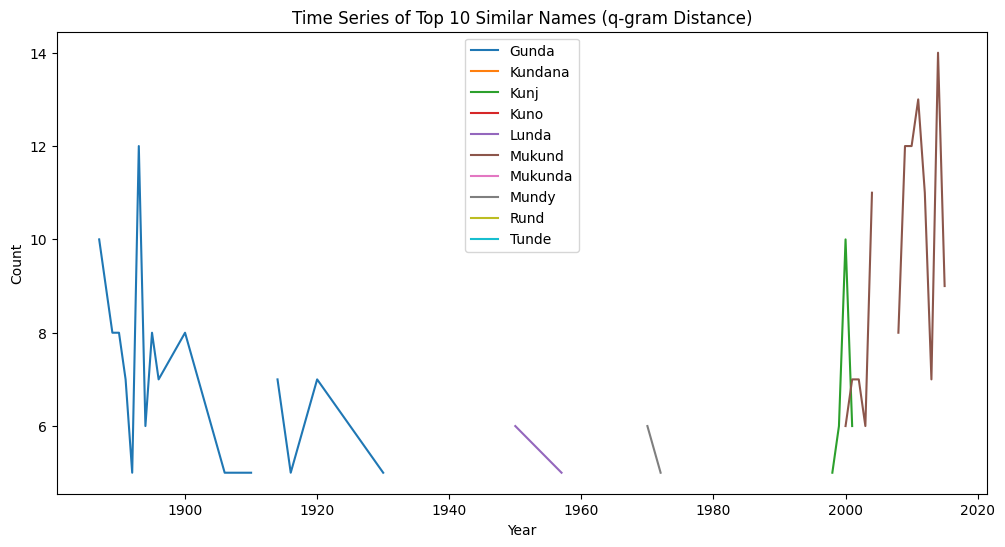

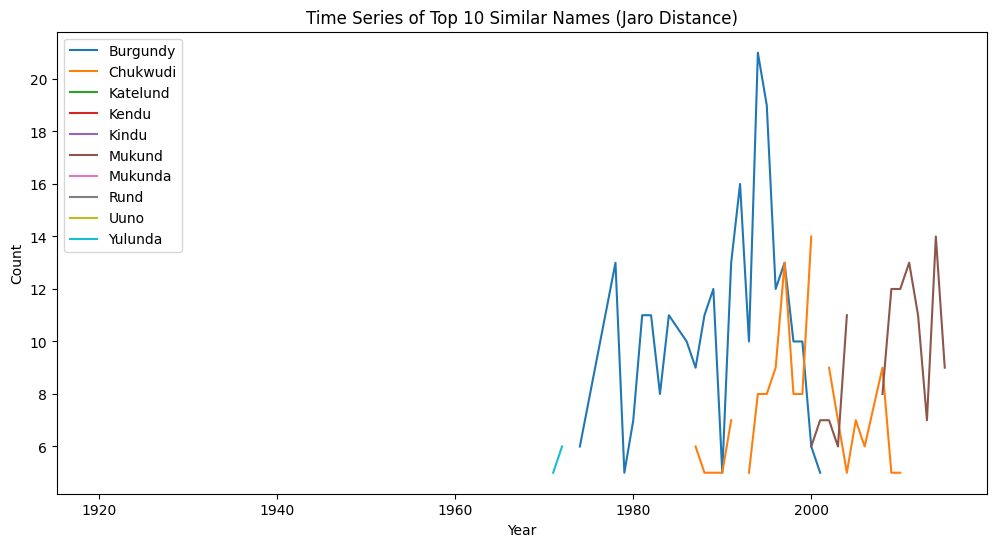

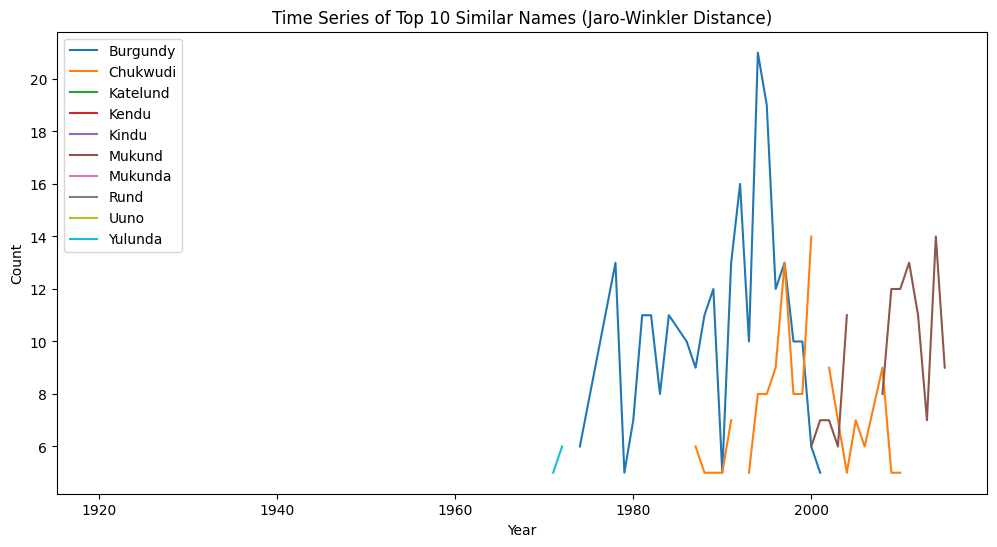

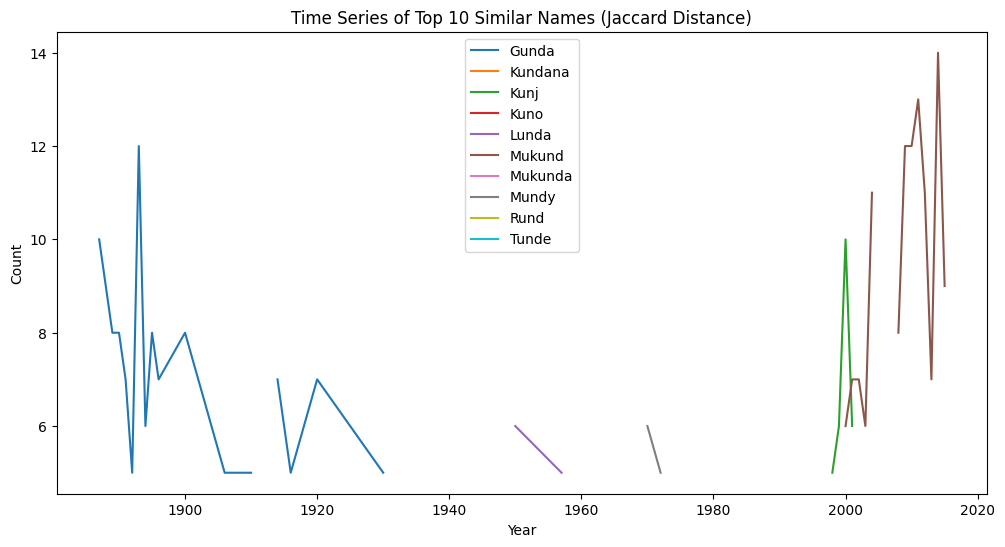

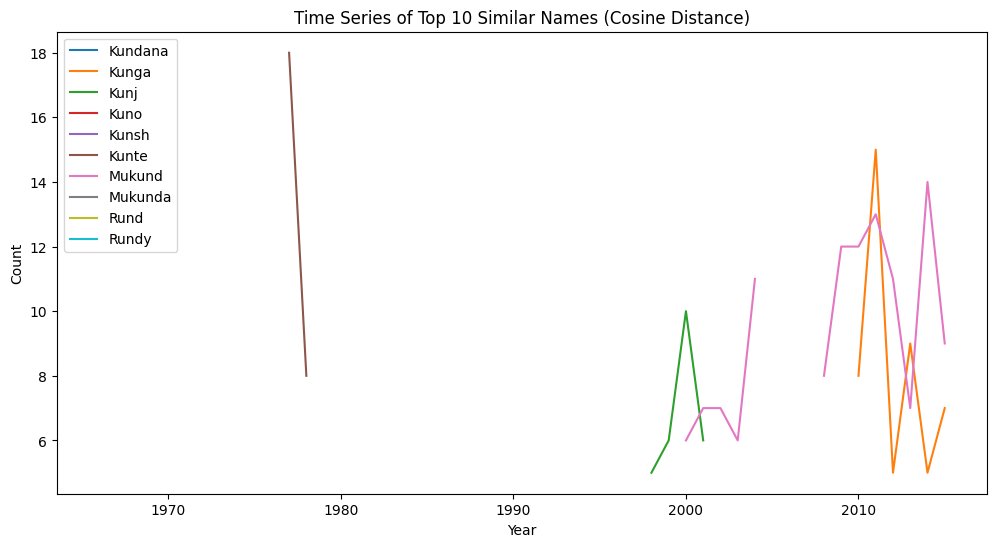

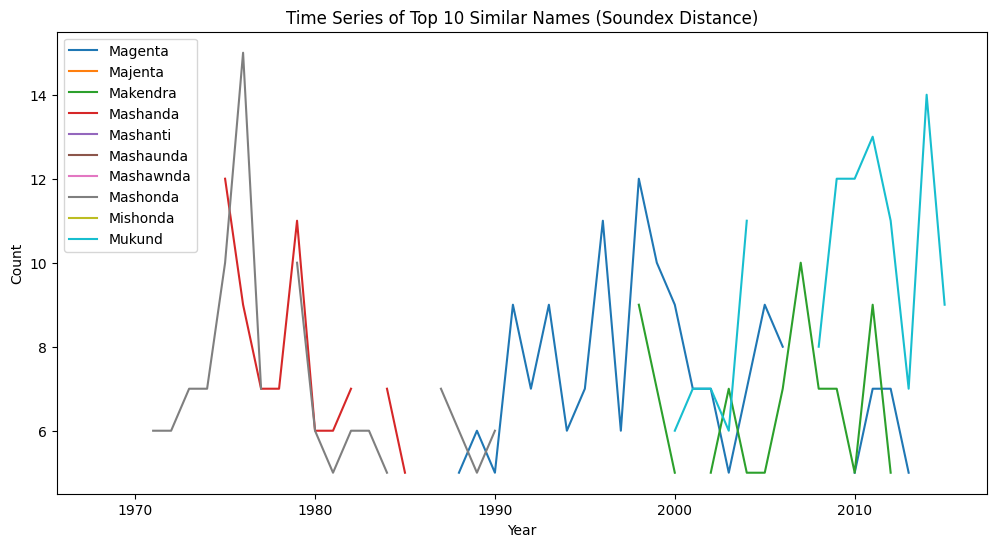

In [15]:
# Plotting the time series
def plot_time_series(a, distance_metric):
    # Subset the data for the top 10 names
    subset = babynames[babynames['Name'].isin(a)]
    # subset = subset[subset['Name'] != input_name] # excluding the input name
    
    # Pivot the data to create a time series
    pivoted = subset.groupby(['YearOfBirth', 'Name'])['Number'].sum().unstack()
    
    # Plot
    pivoted.plot(figsize=(12,6))
    plt.title('Time Series of Top 10 Similar Names (' + distance_metric + ')')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Plotting the time series for each distance metric
# plot_time_series(top10_hamming, 'Hamming Distance')
plot_time_series(top10_lcs, 'Longest Common Substring Distance')
plot_time_series(top10_levenshtein, 'Levenshtein Distance')
plot_time_series(top10_dl, 'Damerau-Levenshtein Distance')
plot_time_series(top10_restricted_dl, 'Restricted Damerau-Levenshtein Distance')
plot_time_series(top10_qgram, 'q-gram Distance')
plot_time_series(top10_jaro, 'Jaro Distance')
plot_time_series(top10_jaro_winkler, 'Jaro-Winkler Distance')
plot_time_series(top10_jaccard, 'Jaccard Distance')
plot_time_series(top10_cosine, 'Cosine Distance')
plot_time_series(top10_soundex, 'Soundex Distance')


It is easy to note that the first name "Mukund" is not so common in the US and it has only started to appear after the 2000s. The "babynames" dataset consists of a large collection of names and their frequency of occurrence over the years. Therefore, the distance metrics that work well with longer strings and are capable of taking into account the semantic meaning of the symbols are likely to perform better on this dataset. Regarding which distance metrics to use for finding the related baby names and their similarities and differences, following are my observations:

The Levenshtein distance, Full Damerau-Levenshtein distance, and q-gram distance are examples of metrics that work well with longer strings and are capable of taking into account the semantic meaning of the symbols. The Levenshtein distance and Full Damerau-Levenshtein distance are capable of handling the insertion, deletion, and substitution of symbols in a string, which is especially useful for measuring the distance between names with different lengths or with common phonemes but different spellings. The q-gram distance, on the other hand, breaks the names into substrings of a fixed length, which helps to capture the semantic meaning of the symbols and is less sensitive to the order of the symbols.

The Longest Common Substring distance and Jaro distance, while still useful, may not be as effective on this dataset due to the large variation in the length of names and the high degree of variation in the order of the symbols. However, the Jaro-Winkler distance, which gives more weight to the initial characters, may be more effective as it can capture the similarities between names that share a common prefix.

The Hamming distance, while useful in certain contexts, is not as applicable to this dataset as it only works on strings of the same length, and doesn't take into account the semantic meaning of the symbols.

The Jaccard distance and cosine distance between q-gram profiles, while useful for comparing the similarity of short strings, may not be the best choice for the babynames dataset, as names can vary significantly in length, and the size of the q-grams may need to be adjusted to ensure accurate results.

Finally, the distance based on Soundex encoding is useful for comparing the similarity of names that sound alike but are spelled differently. It can help to identify common phonemes and group similar sounding names together, but it may not be as effective in capturing the semantic meaning of the symbols as some of the other distance metrics.

